In [28]:
#标准方程法
import numpy as np
from numpy  import genfromtxt
import matplotlib.pyplot as plt

In [29]:
data = genfromtxt(r"longley.csv",delimiter=",")

In [30]:
x_data = data[1:,2:]
y_data = data[1:,1,np.newaxis]

In [31]:
X_data = np.concatenate((np.ones((16,1)),x_data),axis=1)

In [32]:
def weights(xArr,yArr,lam=0.2):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    xTx = xMat.T * xMat
    rxTx = xTx + np.eye(xMat.shape[1])*lam
    if np.linalg.det(rxTx) == 0.0:
        print("this matrix cannot not do inverse")
        return
    ws = rxTx.I * xMat.T*yMat
    return ws

In [33]:
ws = weights(X_data,y_data)
print(ws)

[[ 7.38107886e-04]
 [ 2.07703836e-01]
 [ 2.10076376e-02]
 [ 5.05385441e-03]
 [-1.59173066e+00]
 [ 1.10442920e-01]
 [-2.42280461e-01]]


In [34]:
#result
result = np.mat(X_data)*np.mat(ws)

In [35]:
#sklearn
import numpy as np
from numpy import genfromtxt
from sklearn import linear_model

In [36]:
data = genfromtxt(r"longley.csv",delimiter=',')
print(data)
x_data = data[1:,2:]
y_data = data[1:,1]

[[     nan      nan      nan      nan      nan      nan      nan      nan]
 [     nan   83.     234.289  235.6    159.     107.608 1947.      60.323]
 [     nan   88.5    259.426  232.5    145.6    108.632 1948.      61.122]
 [     nan   88.2    258.054  368.2    161.6    109.773 1949.      60.171]
 [     nan   89.5    284.599  335.1    165.     110.929 1950.      61.187]
 [     nan   96.2    328.975  209.9    309.9    112.075 1951.      63.221]
 [     nan   98.1    346.999  193.2    359.4    113.27  1952.      63.639]
 [     nan   99.     365.385  187.     354.7    115.094 1953.      64.989]
 [     nan  100.     363.112  357.8    335.     116.219 1954.      63.761]
 [     nan  101.2    397.469  290.4    304.8    117.388 1955.      66.019]
 [     nan  104.6    419.18   282.2    285.7    118.734 1956.      67.857]
 [     nan  108.4    442.769  293.6    279.8    120.445 1957.      68.169]
 [     nan  110.8    444.546  468.1    263.7    121.95  1958.      66.513]
 [     nan  112.6    482.

In [41]:
# 创建模型 生成50个值
alphas_to_test = np.linspace(0.001, 1)
# 创建模型，保存误差值 CV 交叉验证
model = linear_model.RidgeCV(alphas=alphas_to_test, store_cv_values=True)
model.fit(x_data, y_data)

# 岭系数
print(model.alpha_)
# loss值
print(model.cv_values_.shape)#16条 数据  50个
#print(model.cv_values_)

0.40875510204081633
(16, 50)


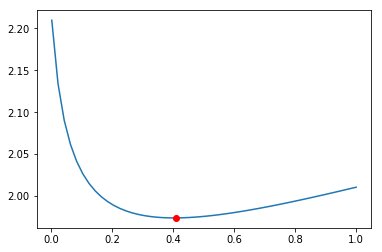

In [38]:
# 画图
# 岭系数跟loss值的关系
plt.plot(alphas_to_test, model.cv_values_.mean(axis=0))
# 选取的岭系数值的位置
plt.plot(model.alpha_, min(model.cv_values_.mean(axis=0)),'ro')
plt.show()

In [39]:
model.predict(x_data[2,np.newaxis])#add demi

array([88.11216213])